# Mini Project #2: MNIST Analysis

An easy-to-follow scikit-learn tutorial that will help you to get started with the Python machine learning.

## Machine Learning with Python

Machine learning is a branch in computer science that studies the design of algorithms that can learn.

Typical tasks are concept learning, function learning or “predictive modeling”, clustering and finding predictive patterns. These tasks are learned through available data that were observed through experiences or instructions, for example.

The hope that comes with this discipline is that including the experience into its tasks will eventually improve the learning. But this improvement needs to happen in such a way that the learning itself becomes automatic so that humans like ourselves don’t need to interfere anymore is the ultimate goal.

Today’s scikit-learn tutorial will introduce you to the basics of Python machine learning:

- Part 1: You'll learn how to use Python and its libraries to explore your data with the help of matplotlib and Principal Component Analysis (PCA),
- Part 2a: And you'll preprocess your data with normalization and you'll split your data into training and test sets.
- Part 2b: Next, you'll work with the well-known KMeans algorithm to construct an unsupervised model, fit this model to your data, predict values, and validate the model that you have built.
- Part 3: As an extra, you'll also see how you can also use Support Vector Machines (SVM) to construct another model to classify your data.

Let's move to part 2 now.

## K-means Clustering

Now that you have even more information about your data and you have a visualization ready, it does seem a bit like the data points sort of group together, but you also see there is quite some overlap.

This might be interesting to investigate further.

Do you think that, in a case where you knew that there are 10 possible digits labels to assign to the data points, but you have no access to the labels, the observations would group or “cluster” together by some criterion in such a way that you could infer the labels?

Now this is an analytical question called __unsupervised learning__.

In general, when you have acquired a good understanding of your data, you have to decide on the use cases that would be relevant to your data set. In other words, you think about what your data set might teach you or what you think you can learn from your data.

From there on, you can think about what kind of algorithms you would be able to apply to your data set in order to get the results that you think you can obtain.

Tip: the more familiar you are with your data, the easier it will be to assess the use cases for your specific data set. The same also holds for finding the appropriate machine algorithm.

However, when you’re first getting started with `scikit-learn`, you’ll see that the amount of algorithms that the library contains is pretty vast and that you might still want additional help when you’re doing the assessment for your data set. That’s why the below `scikit-learn` machine learning map will come in handy.

<img src = 'https://scikit-learn.org/stable/_static/ml_map.png' />
[Image Source](https://scikit-learn.org/stable/tutorial/machine_learning_map/)

Note that this map does require you to have some knowledge about the algorithms that are included in the `scikit-learn `library. This, by the way, also holds some truth for taking this next step in your project: if you have no idea what is possible, it will be very hard to decide on what your use case will be for the data.

As your use case was one for clustering, you can follow the path on the map towards “KMeans”. You’ll see the use case that you have just thought about requires you to have more than 50 samples (“check!”), to have labeled data (“check!”), to know the number of categories that you want to predict (“check!”) and to have less than 10K samples (“check!”).

But what exactly is the __K-Means__ algorithm?

It is one of the simplest and widely used __unsupervised learning__ algorithms to solve __clustering__ problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters that you have set before you run the algorithm. This number of clusters is called `k` and you select this number at your discretion.

Then, the k-means algorithm will find the __nearest cluster center__ for each data point and assign the closest data point to that cluster.

Once all data points have been assigned to clusters, the cluster centers will be recomputed. In other words, new cluster centers will emerge from the average of the values of the cluster data points. This process is repeated until most data points stick to the same cluster. The cluster membership should stabilize.

You can already see that, because the k-means algorithm works the way it does, the initial set of cluster centers that you give up can have a __big effect__ on the clusters that are eventually found. You can, of course, deal with this effect, as you will see further on.

However, before you can go into making a model for your data, you should definitely take a look into preparing your data for this purpose. 

Let's first import the `digits` data from `scikit-learn` `datasets` again. If you don't remember how to do so, please refer to part 1 of this project.

In [23]:
# import `datasets` from `sklearn`.
from sklearn import datasets

# read `digits` using `load_digits()` into a variable called `digits`
digits = datasets.load_digits()

In [24]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Preprocessing Your Data
As you have read in the previous section, before modeling your data, you’ll do well by preparing it first. This preparation step is called __preprocessing__.

### Data Normalization
The first thing that we’re going to do is normalize/standardize the data. 

We often use these two together, but they actually mean different things:

- __Normalization__ usually means making the data values in the same range;
- __Standardization__ usually means making the data values follow the standardized distribution (mean of `0` and standard deviation of `1`).

You can standardize the digits data by, for example, making use of the `scale()` method:

In [66]:
# Import `scale` from `sklearn.preprocessing`
from sklearn.preprocessing import scale
import numpy as np

# Apply `scale()` to the `digits` data
scale(digits.data)

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

By scaling the data, you shift the distribution of each attribute to have a mean of `0` and a standard deviation of `1` (unit variance).

### Splitting Your Data Into Training And Test Sets
In order to assess your model’s performance later, you will also need to divide the data set into two parts: a __training set__ and a __test set__. The first is used to train the model, while the second is used to evaluate the learned or trained model.

__NOTE__: in part 1 if you stick with the `pandas` `read_csv()` method to get your data, it is already split into __training__ and __test__.

In practice, the division of your data set into a test and a training sets is disjoint: the most common splitting choice is to take `2/3` of your original data set as the training set, while the `1/3` that remains will compose the test set.

You will try to do this  here. You see in the code chunk below that this ‘traditional’ splitting choice is respected: in the arguments of the `train_test_split()` method, you clearly see that the test_size is set to 0.25 - which means 75% of the data will be used in training the model.

You’ll also note that the argument `random_state` has the value `2019` assigned to it. With this argument, you can guarantee that your split will always be the same. That is particularly handy if you want reproducible results.

__NOTE__: you should always use `random_state`, or its equivalent parameters (e.g. `seed`), in your analysis, to guarantee the reproducibility and comparison capability.

In [67]:
# Import `train_test_split` from `sklearn.model_selection`
import numpy as np
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X = digits.data
y = digits.target
# Split `data` into `X_train` and `X_test`
# Split `target` into `y_train` and `y_test`
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2019)
# Split `images` into `images_train` and `images_test`
images_data = digits.images
images_train, images_test = train_test_split(images_data)

In [68]:
# data is split 
print('Training-Test/Train: ',(len(images_train) - len(images_test))/len(images_train)*100)
print('2/3: ',2/3)

Training-Test/Train:  66.59242761692651
2/3:  0.6666666666666666


After you have split up your data set into train and test sets, you can quickly inspect the numbers before you go and model the data. You should look at the dimensionalities of your `X` and `y` data.

In [69]:
import numpy as np

# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
#### n_samples is how much rows of data you have in that sample (X_train for us)
print(n_samples)

# Print out `n_features`
#### n_features is how much columns or attributes you have to train the model
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
#### feature is input; label is output. So, this means how much data you have after the model output 
print(len(y_train))

1347
64
1347


You’ll see that the training set `X_train` now contains `1347` samples, which is exactly `75%` of the samples that the original data set contained, and 64 features, which hasn’t changed. The y_train training set also contains `75%` of the labels of the original data set. This means that the test sets `X_test` and `y_test` contain `450` samples.

## Clustering The `digits` Data
After all these preparation steps, you have made sure that all your known (training) data is stored. No actual model or learning was performed up until this moment.

Now, it’s finally time to find those clusters of your training set. Use KMeans() from the cluster module to set up your model. You’ll see that there are three arguments that are passed to this method: `init`, `n_clusters` and the `random_state`.

You might still remember this last argument from before when you split the data into training and test sets. This argument basically guaranteed that you got reproducible results. Please use the same `random_state` here.

The other important thing here is determining the value of `k` in `n_clusters`. Here it is easy (`n_clusters = 10`) since we already know that the data has `10` classes. There is a greater chance we you conduct an __unsupervised learning__ analysis and you do not have classes - then you will have to try different value of `k`.

In [70]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=2019)

# Fit the training data `X_train`to the model
train_results = clf.fit(X_train)

The `init` parameter indicates the method for initialization and even though it defaults to `k-means++`, you see it explicitly coming back in the code. That means that you can leave it out if you want. 

Next, you also see that the `n_clusters` argument is set to 10. This number not only indicates the number of clusters or groups you want your data to form, but also the number of centroids to generate. _Remember that a cluster centroid is the __center__ of a cluster_.

Do you also still remember how the previous section described this as one of the possible disadvantages of the K-Means algorithm?

That is, that the initial set of cluster centers that you give up can have a big effect on the clusters that are eventually found?

Usually, you try to deal with this effect by trying __several__ initial sets in multiple runs and by selecting the set of clusters with the __minimum__ _sum of the squared errors (SSE)_. In other words, you want to minimize the distance of each point in the cluster to the mean or centroid of that cluster.

By adding the `n-init` argument to `KMeans()`, you can determine how many different centroid configurations the algorithm will try.

Note again that you don’t want to insert the test labels when you fit the model to your data: these will be used to see if your model is good at predicting the actual classes of your instances!

You can also visualize the images that make up the cluster centers as follows:

All these images are blurry, correct? That's because they are averages of the points in different clusters. From there you can already guess which clusters will perform better than others. For instance, the right-most one on the first row is obviously an `0` - which means all images in that cluster are similar.

Yes - you want all data points in one cluster to be similar; and you want data points between different clusters to be as different as they can be - that is the idea behind a very important evaluation metric, the `silhouette score`.

If you want to see another example that visualizes the data clusters and their centers, go here.

The next step is to apply the clustering (results from a cluster model) to the __test data__, to generate labels for them:

In [87]:
y_test.shape

(450,)

In [93]:
# Predict the labels for `X_test` using `.predict()`
y_pred = train_results.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers


[8 4 6 4 5 5 8 3 9 2 4 6 2 8 2 5 4 7 8 7 6 5 7 1 8 2 2 4 5 9 7 5 7 5 9 4 4
 2 8 2 4 0 7 1 9 4 1 6 4 4 6 7 7 1 6 4 6 5 7 8 8 1 6 3 7 6 3 5 2 4 6 4 5 5
 6 1 8 3 8 1 7 8 1 2 6 8 5 6 6 7 1 6 5 2 4 6 6 0 5 7]
[5 9 2 9 6 6 5 2 4 1 5 3 1 5 1 6 9 7 5 7 3 6 7 0 5 8 1 5 6 4 7 6 3 6 4 9 8
 1 5 8 9 1 7 0 4 9 0 3 5 9 3 7 4 0 9 8 3 6 7 5 5 0 3 2 4 3 2 6 8 3 3 8 6 6
 3 0 5 2 5 0 7 5 0 1 3 5 6 3 3 7 0 3 6 8 5 8 3 9 6 9]


We can use following code to determine how different `y_pred` and `y_test` are - that is how we evaluate the predictive results.

In [95]:
# compare `y_test` with `y_pred`
np.count_nonzero(y_test == y_pred)

46

This means only `38` out of `100` samples are correct.

In addition, you can study the shape of the cluster centers: you immediately see that there are `10` clusters with each `64` features.

But this doesn’t tell you much because we set the number of clusters to `10` and you already knew that there were `64` features.

Maybe a visualization would be more helpful.

Let’s visualize the predicted labels:

**Isomap** is a nonlinear dimensionality reduction method. It is one of several widely used low-dimensional embedding methods. Isomap is used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points.

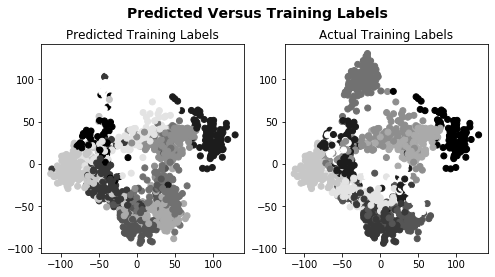

In [96]:
# Import `Isomap()` from `sklearn.manifold`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

You use `Isomap()` as a way to reduce the dimensions of your high-dimensional data set digits. The difference with the PCA method is that the Isomap is a __non-linear__ dimensionality reduction method.

We will create another dimensionality reduction using PCA. Please complete the code below - if you do not remember how to create PCA models, please refer to part 1 of this mini project.

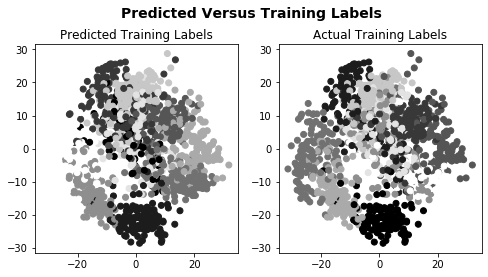

In [103]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# We will use 2 principal components, and the PCA model will fit (`fit_transform()`) to `X_train`
# and name the model `X_pca`
X_pca = pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
# fit (`fit_predict`) `clf` to `X_train` and name it as `clusters`
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
# check the code block above if you have doubts about this
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots
# in `ax[0]`, x-axis is the first component of `X_pca`, y-axis is the second component of `X_pca`
# and color (`c`) is `clusters`
# which means `ax[0]` depicts our prediction
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

# you will set the title of `ax[0]` as 'Predicted Training Labels'
ax[0].set_title('Predicted Training Labels')
# we also need to create another subplot `ax[1]` to depict the actual data `y_train`
# in `ax[1]`, x-axis is the first component of `X_pca`, y-axis is the second component of `X_pca`
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
# you will set the title of `ax[10]` as 'Actual Training Labels'
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

At first sight, the visualization doesn’t seem to indicate whether the model works well.

But this needs some further investigation.

### Evaluation of Your Clustering Model
And this need for further investigation brings you to the next essential step, which is the evaluation of your model’s performance. In other words, you want to analyze the degree of correctness of the model’s predictions - in classification analysis, we use __confusion matrix__ for that.

Let’s print out a confusion matrix:

[[ 0 47  0  0  0  0  0  0  0  0]
 [10  0 23  7  0  1  0  0  0  0]
 [ 1  0  2 36  0  0  3  0  0  0]
 [ 0  0  1  0  3  0 45  2  1  0]
 [ 0  0  0  0  0  0  0  2  0 38]
 [ 0  0  0  0 15  0  1  0 32  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 2  0 20  2 16  0  1  2  2  0]
 [ 8  0  0  0 34  0  3  1  0  0]]


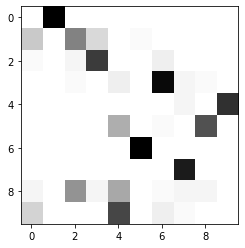

In [122]:
# Import `confusion_matrix` from `sklearn.metrics`
from sklearn.metrics import confusion_matrix

# Print out the confusion matrix with `confusion_matrix()`
# the `confusion_matrix()` should be between `y_test` and `y_pred`
conf = confusion_matrix(y_test,y_pred)
print(conf)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

        0  1  2   <- Predicted
     0 [2, 0, 0]  
     1 [0, 0, 1]  
     2 [1, 0, 2] 
TRUE
- At 0,0: True value was 0, Predicted value was 0, - 2 times predicted
- At 1,1: True value was 1, Predicted value was 1, - 0 times predicted
- At 2,2: True value was 2, Predicted value was 2, - 2 times predicted
- At 1,2: True value was 1, Predicted value was 2, - 1 time predicted
- At 2,0: True value was 2, Predicted value was 0, - 1 time predicted...

You will want higher values to appear in the top-left to lower-right diagonal line of the matrix.

**Answer the question:**
Observe the confusion matrix above - which digit(s) are predicted well? Use the block below to provide your answer.

____At 3,3: true value was 3 and predicted value was 3 - 2 times predicted
At 8,8: true value was 8 and predicted value was 8 - 42 times predicted
At 9,9: true value was 9 and predicted value was 9 - 2 times predicted.
So 8 was predicted best and then 3 and 9____.

You might need to know a bit more about the results than just the confusion matrix.

Let’s try to figure out something more about the quality of the clusters by applying different cluster quality metrics. That way, you can judge the goodness of fit of the cluster labels to the correct labels.

In [120]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia homo    compl   v-meas  ARI     AMI      silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia homo    compl   v-meas  ARI     AMI      silhouette
878639   0.758   0.768   0.763   0.665   0.753    0.186


You’ll see that there are quite some metrics to consider:

- The __homogeneity__ (`homo`) score tells you to what extent all of the clusters contain only data points which are members of a single class.
- The __completeness__ (`compl`) score measures the extent to which all of the data points that are members of a given class are also elements of the same cluster - e.g. how many `0`s in cluster `0`.
- The __V-measure__ (`v-meas`) score is the harmonic mean between homogeneity and completeness.
- The adjusted Rand index (`ARI`) measures the similarity between two clusterings and considers all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The Adjusted Mutual Info (`AMI`) score is used to compare clusters. It measures the similarity between the data points that are in the clusterings, accounting for chance groupings and takes a maximum value of 1 when clusterings are equivalent.
- The `silhouette` score measures how similar an object is to its own cluster compared to other clusters. The silhouette scores ranges from -1 to 1, where a higher value indicates that the object is better matched to its own cluster and worse mached to neighboring clusters. If many points have a high value, the clusteirng configuration is good.

You clearly see that these scores aren’t fantastic: for example, you see that the value for the `silhouette` score is close to `0`, which indicates that the sample is on or very close to the decision boundary between two neighboring clusters. This could indicate that the samples could have been assigned to the wrong cluster.

Also the `ARI` measure seems to indicate that not all data points in a given cluster are similar and the `completeness` score tells you that there are definitely data points that weren’t put in the right cluster.

Looks like we did not do too well using __unsupervised, cluster__ models, in the next part we will try a __supervised learning__ model to see if the results will improve.

That's all for part 2. Please make sure your sync the complete notebook to your github repo for submission.